<a href="https://colab.research.google.com/github/vineelagurram2002/Neural-Networks/blob/main/Vineela%20Gurram_700757960_ICP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# Reshape y_train and y_test to 1D arrays
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the LeNet-5 model
lenet = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1, activation='relu', input_shape=(32,32,3), padding='same'),  # C1
    keras.layers.AveragePooling2D(pool_size=(2, 2)),  # S1
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'),  # C2
    keras.layers.AveragePooling2D(pool_size=(2, 2)),  # S2
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='relu', padding='valid'),  # C3
    keras.layers.Flatten(),  # Flatten
    keras.layers.Dense(84, activation='relu'),  # F1
    keras.layers.Dense(10, activation='softmax')  # Output layer
])

lenet.summary()

# Compile the model
lenet.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = lenet.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = lenet.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Classification report
y_pred = np.argmax(lenet.predict(x_test), axis=-1
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 16, 16, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 6, 6, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 2, 2, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 84)                  │          40,404 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,246 (360.34 KB)

 Trainable params: 92,246 (360.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.3203 - loss: 1.8415 - val_accuracy: 0.4798 - val_loss: 1.4401
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.4988 - loss: 1.3933 - val_accuracy: 0.5233 - val_loss: 1.3334
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.5486 - loss: 1.2657 - val_accuracy: 0.5452 - val_loss: 1.2654
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 38ms/step - accuracy: 0.5684 - loss: 1.1974 - val_accuracy: 0.5593 - val_loss: 1.2239
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.5965 - loss: 1.1293 - val_accuracy: 0.5839 - val_loss: 1.1812
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6154 - loss: 1.0784 - val_accuracy: 0.5903 - val_loss: 1.1536
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.6365 - loss: 1.0270 - val_accuracy: 0.5965 - val_loss: 1.1343
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.6524 -

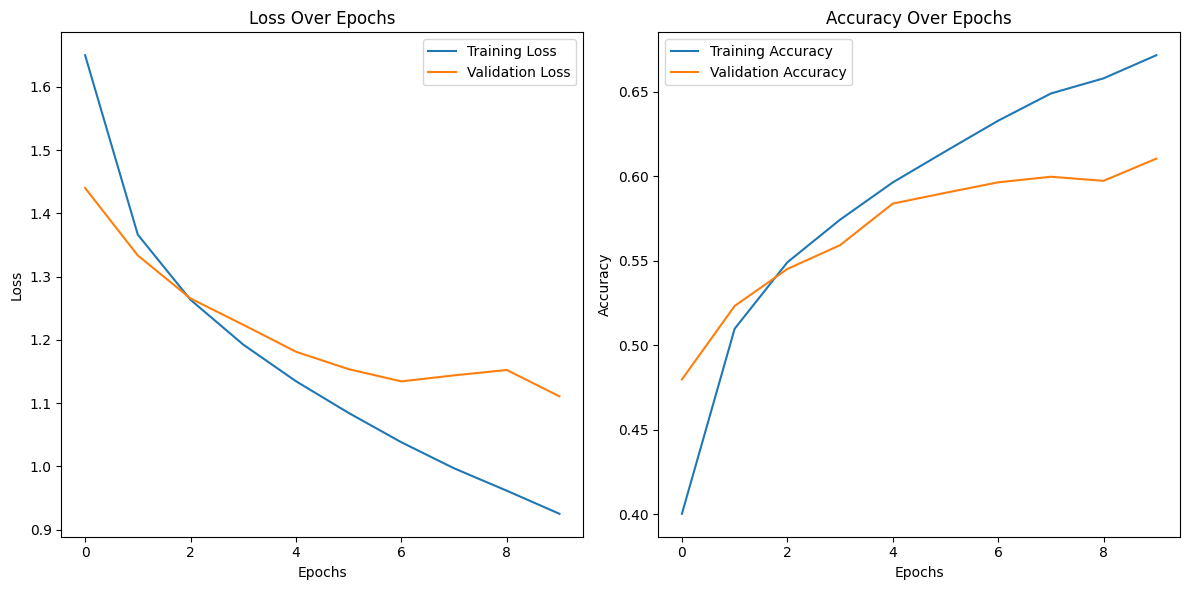

In [13]:
plt.figure(figsize=(12, 6))

# Loss over epochs
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')  # Changed 'hist' to 'history'
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Changed 'hist' to 'history'
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
